<a href="https://colab.research.google.com/github/ASHISHVERMA114142/ML_Projects/blob/main/CNN_G05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

--2022-04-06 10:26:23--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.2.72.111, 2600:1407:3c00:108c::e59, 2600:1407:3c00:10a2::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.2.72.111|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_3367a.zip’

kagglecatsanddogs_3 100%[===================>] 786.68M   145MB/s    in 5.9s    

2022-04-06 10:26:29 (132 MB/s) - ‘kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]



In [ ]:
!unzip kagglecatsanddogs_3367a.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt      
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

In [ ]:
input_path = []
label = []

for class_name in os.listdir("PetImages"):  # listing the dir of PetImages
    for path in os.listdir("PetImages/"+class_name): # extracting each path and then saving into the pathList and assigning the lables to each image...
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("PetImages", class_name, path))
print(input_path[0], label[0])

PetImages/Dog/1778.jpg 1


Now creating the dataset 


In [ ]:
df = pd.DataFrame()
df['images'] = input_path  # creating the column that contain the path of the image and corresponding label value....
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True) # since our data has similarity so we are rendomly distribution each row in the dataset....
df.head()

,images,label
0,PetImages/Cat/8083.jpg,0
1,PetImages/Dog/11283.jpg,1
2,PetImages/Dog/5199.jpg,1
3,PetImages/Cat/5397.jpg,0
4,PetImages/Cat/3506.jpg,0


In [ ]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

PetImages/Dog/Thumbs.db
PetImages/Cat/Thumbs.db


In [ ]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l


['PetImages/Dog/Thumbs.db',
 'PetImages/Cat/Thumbs.db',
 'PetImages/Dog/11702.jpg',
 'PetImages/Cat/666.jpg']

In [ ]:
# delete db files
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
len(df)

24998

####EDA

In [ ]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

In [ ]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

#####Creating DataGenerator for the Images

In [ ]:
df['label'] = df['label'].astype('str')

In [ ]:
df.head()

,images,label
0,PetImages/Cat/8083.jpg,0
1,PetImages/Dog/11283.jpg,1
2,PetImages/Dog/5199.jpg,1
3,PetImages/Cat/5397.jpg,0
4,PetImages/Cat/3506.jpg,0


In [ ]:
# input split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

Generating the data...


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)
 
# regularization...
val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

####Creating Model

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [ ]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
40/40 [==============================] - 158s 4s/step - loss: 0.7173 - accuracy: 0.5547 - val_loss: 0.6292 - val_accuracy: 0.6436
Epoch 2/10
40/40 [==============================] - 145s 4s/step - loss: 0.6142 - accuracy: 0.6591 - val_loss: 0.5934 - val_accuracy: 0.6764
Epoch 3/10
40/40 [==============================] - 145s 4s/step - loss: 0.5689 - accuracy: 0.7041 - val_loss: 0.6029 - val_accuracy: 0.6728
Epoch 4/10
40/40 [==============================] - 144s 4s/step - loss: 0.5486 - accuracy: 0.7200 - val_loss: 0.5162 - val_accuracy: 0.7422
Epoch 5/10
40/40 [==============================] - 143s 4s/step - loss: 0.5256 - accuracy: 0.7347 - val_loss: 0.4960 - val_accuracy: 0.7586
Epoch 6/10
40/40 [==============================] - 141s 4s/step - loss: 0.5081 - accuracy: 0.7487 - val_loss: 0.4978 - val_accuracy: 0.7570
Epoch 7/10
40/40 [==============================] - 142s 4s/step - loss: 0.4989 - accuracy: 0.7587 - val_loss: 0.4920 - val_accuracy: 0.7596
Epoch 8/10
40

####Results

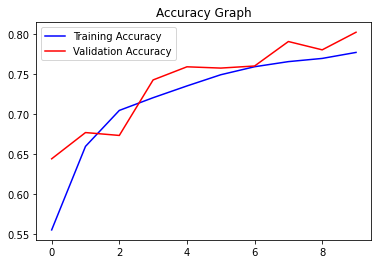

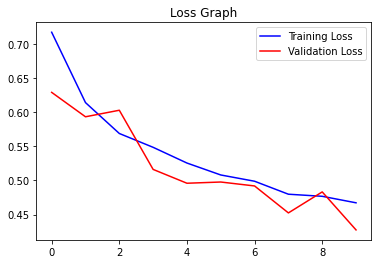

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [ ]:
print(val_acc)
print(acc)

[0.6435999870300293, 0.6764000058174133, 0.6728000044822693, 0.7422000169754028, 0.7585999965667725, 0.7570000290870667, 0.7595999836921692, 0.7901999950408936, 0.7797999978065491, 0.801800012588501]
[0.5547054409980774, 0.6591159105300903, 0.7040703892707825, 0.7199720144271851, 0.7346734404563904, 0.7486748695373535, 0.7586758732795715, 0.7650765180587769, 0.7690768837928772, 0.7765776515007019]
